In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv("./titanic/train.csv")

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24c07510>,
      dtype=object)

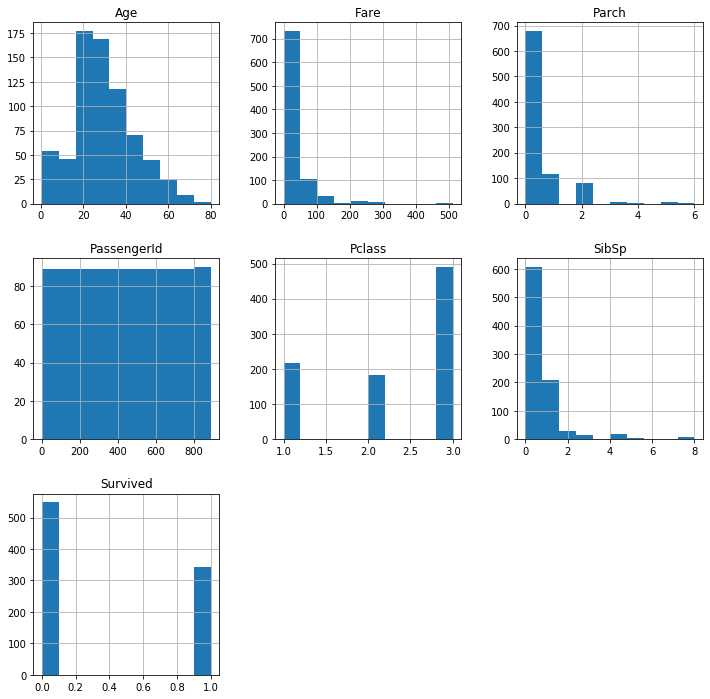

In [56]:
df.hist(figsize = (12,12))

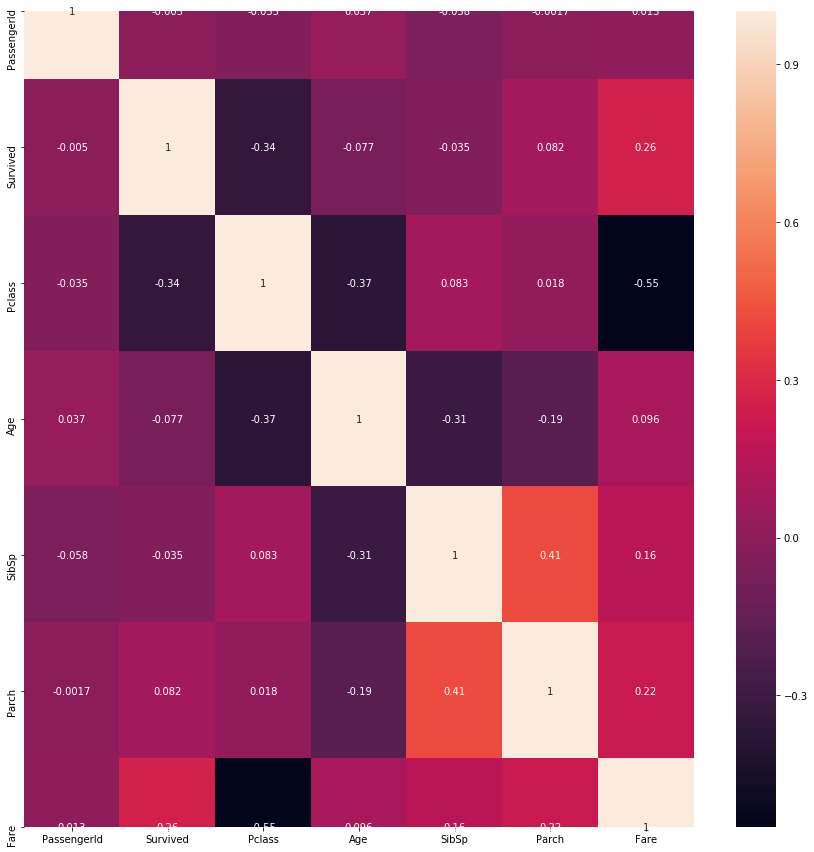

In [57]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot = True)

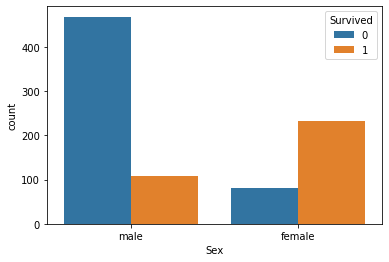

In [58]:
sns.countplot('Sex' , hue = 'Survived',data = df)

In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
from sklearn.model_selection import  train_test_split
#欠損値処理
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

#カテゴリ変数の変換
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map( {'S': 0 , 'C':1 , 'Q':2}).astype(int)

#不要なcolumnを削除
df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis =1)

#学習データとテストデータに分割
train_X = df.drop('Survived',axis = 1)
train_y = df.Survived

In [61]:
print(train_X)

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         0
1         1    0  38.0      1      0  71.2833         1
2         3    0  26.0      0      0   7.9250         0
3         1    0  35.0      1      0  53.1000         0
4         3    1  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         0
887       1    0  19.0      0      0  30.0000         0
888       3    0  28.0      1      2  23.4500         0
889       1    1  26.0      0      0  30.0000         1
890       3    1  32.0      0      0   7.7500         2

[891 rows x 7 columns]


In [62]:
print(train_y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [63]:
(train_X , test_X , train_y , test_y) = train_test_split(train_X, train_y , test_size = 0.3 , random_state = 0)

In [64]:
print(train_X)

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
857       1    1  51.0      0      0  26.5500         0
52        1    0  49.0      1      0  76.7292         1
386       3    1   1.0      5      2  46.9000         0
124       1    1  54.0      0      1  77.2875         0
578       3    0  28.0      1      0  14.4583         1
..      ...  ...   ...    ...    ...      ...       ...
835       1    0  39.0      1      1  83.1583         1
192       3    0  19.0      1      0   7.8542         0
629       3    1  28.0      0      0   7.7333         2
559       3    0  36.0      1      0  17.4000         0
684       2    1  60.0      1      1  39.0000         0

[623 rows x 7 columns]


In [65]:
print(test_X)

Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
495       3    1  28.0      0      0   14.4583         1
648       3    1  28.0      0      0    7.5500         0
278       3    1   7.0      4      1   29.1250         2
31        1    0  28.0      1      0  146.5208         1
255       3    0  29.0      0      2   15.2458         1
..      ...  ...   ...    ...    ...       ...       ...
263       1    1  40.0      0      0    0.0000         0
718       3    1  28.0      0      0   15.5000         2
620       3    1  27.0      1      0   14.4542         1
786       3    0  18.0      0      0    7.4958         0
64        1    1  28.0      0      0   27.7208         1

[268 rows x 7 columns]


In [66]:
print(train_y)

857    1
52     1
386    0
124    0
578    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 623, dtype: int64


In [67]:
print(test_y)

495    0
648    0
278    0
31     1
255    1
      ..
263    0
718    0
620    0
786    1
64     0
Name: Survived, Length: 268, dtype: int64


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (roc_curve , auc ,accuracy_score)

#モデルを作成して予測を実行
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

#正解率の算出
accuracy_score(pred, test_y)

0.7798507462686567

In [69]:
from sklearn.ensemble import RandomForestClassifier

#モデルを作成して予測を実行
clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

#正解率の算出
accuracy_score(pred,test_y)

0.8283582089552238

In [70]:
fin = pd.read_csv('./titanic/test.csv')
fin.head()

passsengerid = fin['PassengerId']
fin.isnull().sum()
fin['Fare'] = fin['Fare'].fillna(fin['Fare'].median())
fin['Age'] = fin['Age'].fillna(fin['Age'].median())
fin['Embarked'] = fin['Embarked'].fillna('S')

#カテゴリ変数の変換
fin['Sex'] = fin['Sex'].apply(lambda x: 1 if x == 'male' else 0)
fin['Embarked'] = fin['Embarked'].map( {'S': 0 , 'C':1 , 'Q':2}).astype(int)

#不要なcolumnを削除
fin= fin.drop(['Cabin','Name','Ticket','PassengerId'],axis =1)
#ランダムフォレストで予測
predictions = clf.predict(fin)

submission = pd.DataFrame({'PassengerId':passsengerid, 'Survived':predictions})
submission.to_csv('./titanic/dist/submission.csv' , index = False)